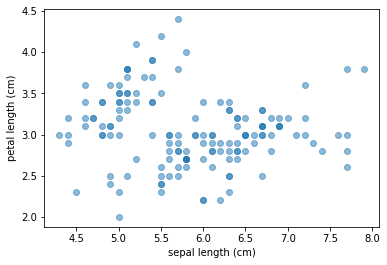

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets 

iris = datasets.load_iris()


samples = iris.data

x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

Implementing K-Means: Step 1
The K-Means algorithm:

Place k random centroids for the initial clusters.
Assign data samples to the nearest centroid.
Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence.

[[7.44891971 2.0585129 ]
 [7.14869123 2.10169964]
 [5.76559464 4.29394729]]


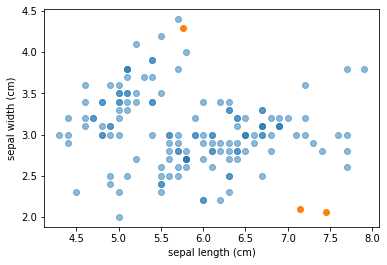

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

combined = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()


In [21]:
# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# Distances to each centroid

distances = np.zeros(k)

# Assign to the closest centroid

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# Print labels

print(labels)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2.
 2. 1. 2. 2. 2. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 0. 0. 1.
 1. 2. 0. 1. 1. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 0. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2.]
